In [1546]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

import warnings
warnings.filterwarnings("ignore")

In [1547]:
kospi1 = pd.read_csv("./데이터/코스피전체연결(17~22).csv", encoding = "euc-kr")
kospi2 = pd.read_csv("./데이터/코스피전체개별(17~22).csv", encoding = "euc-kr")

In [1548]:
kospi1.columns

Index(['회사명', '거래소코드', '회계년도', '종가', 'PER(최고)(IFRS)', 'PER(최저)(IFRS)',
       'PBR(최고)(IFRS)', 'PBR(최저)(IFRS)', 'PCR(최고)(IFRS)', 'PCR(최저)(IFRS)',
       'PSR(최고)(IFRS)', 'PSR(최저)(IFRS)', 'EV/EBITDA(IFRS)', '자기자본순이익률(IFRS연결)',
       '자산(*)(IFRS연결)', '당기순이익(손실)(IFRS연결)', '판매비와 관리비(물류원가 등 포함)(*)(IFRS연결)',
       '연구개발비(IFRS연결)', '매출액(수익)(*)(IFRS연결)', '* (정상)영업손익(보고서기재)(IFRS연결)'],
      dtype='object')

In [1549]:
# st13 = pd.read_csv("./데이터/코스피주식(2013).csv", encoding = "euc-kr")
# st14 = pd.read_csv("./데이터/코스피주식(2014).csv", encoding = "euc-kr")
# st15 = pd.read_csv("./데이터/코스피주식(2015).csv", encoding = "euc-kr")
# st16 = pd.read_csv("./데이터/코스피주식(2016).csv", encoding = "euc-kr")
st17 = pd.read_csv("./데이터/코스피주식(2017).csv", encoding = "euc-kr")
st18 = pd.read_csv("./데이터/코스피주식(2018).csv", encoding = "euc-kr")
st19 = pd.read_csv("./데이터/코스피주식(2019).csv", encoding = "euc-kr")
st20 = pd.read_csv("./데이터/코스피주식(2020).csv", encoding = "euc-kr")
st21 = pd.read_csv("./데이터/코스피주식(2021).csv", encoding = "euc-kr")
st22 = pd.read_csv("./데이터/코스피주식(2022).csv", encoding = "euc-kr")

In [1550]:
kospi1.columns = ["회사명", "종목코드", "회계년도", "종가", 'PER(최고)', 'PER(최저)', 'PBR(최고)', 'PBR(최저)', 'PCR(최고)', 'PCR(최저)', 'PSR(최고)', 'PSR(최저)', '이익수익률', 'ROE', '자산', '당기순이익', '판매관리비', '연구개발비', '매출액', '영업이익']
kospi2.columns = ["회사명", "종목코드", "회계년도", "종가", 'PER(최고)', 'PER(최저)', 'PBR(최고)', 'PBR(최저)', 'PCR(최고)', 'PCR(최저)', 'PSR(최고)', 'PSR(최저)', '이익수익률', 'ROE', '자산', '당기순이익', '판매관리비', '연구개발비', '매출액', '영업이익']

In [1551]:
# st13['회계년도'] = '2013/12'
# st14['회계년도'] = '2014/12'
# st15['회계년도'] = '2015/12'
# st16['회계년도'] = '2016/12'
st17['회계년도'] = '2017/12'
st18['회계년도'] = '2018/12'
st19['회계년도'] = '2019/12'
st20['회계년도'] = '2020/12'
st21['회계년도'] = '2021/12'
st22['회계년도'] = '2022/12'


In [1552]:
df = pd.concat([st17, st18, st19, st20, st21, st22], axis=0)

In [1553]:
kospi = kospi1.fillna(kospi2)

In [1554]:
kospi

,회사명,종목코드,회계년도,종가,PER(최고),PER(최저),PBR(최고),PBR(최저),PCR(최고),PCR(최저),PSR(최고),PSR(최저),이익수익률,ROE,자산,당기순이익,판매관리비,연구개발비,매출액,영업이익
0,(주)DB하이텍,990,2017/12,12000.0,14.03,6.76,2.58,1.24,5.73,2.76,1.54,0.74,3.71,27.62,9.939507e+08,110175089.0,110371984.0,54428000.0,6.797377e+08,143195168.0
1,(주)DB하이텍,990,2018/12,10850.0,9.74,4.68,1.84,0.88,5.07,2.44,1.38,0.67,3.73,17.12,1.066534e+09,86828768.0,102343239.0,52810000.0,6.692791e+08,112993143.0
2,(주)DB하이텍,990,2019/12,27600.0,10.60,3.67,2.12,0.73,7.99,2.76,1.59,0.55,5.36,17.40,1.088890e+09,104637012.0,112831598.0,55296000.0,8.074164e+08,181292188.0
3,(주)DB하이텍,990,2020/12,51000.0,14.05,3.90,3.07,0.85,7.50,2.08,2.49,0.69,6.85,23.07,1.178581e+09,166025591.0,119549642.0,58511000.0,9.359198e+08,239335181.0
4,(주)DB하이텍,990,2021/12,72700.0,11.12,6.84,3.30,2.03,9.01,5.54,2.90,1.78,5.94,33.35,1.549938e+09,316891852.0,136089825.0,64222000.0,1.214682e+09,399106778.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4369,흥아해운(주),3280,2018/12,402.0,0.00,0.00,2.97,1.09,0.00,0.00,0.24,0.09,0.00,-91.08,8.036985e+08,-86540156.0,30594105.0,0.0,7.538656e+08,-37595967.0
4370,흥아해운(주),3280,2019/12,481.0,0.00,0.00,7.85,1.93,0.00,0.00,1.40,0.35,58.29,-98.70,4.309627e+08,-51356551.0,18026764.0,0.0,1.021668e+08,-12364293.0
4371,흥아해운(주),3280,2020/12,258.0,0.00,0.00,0.00,0.00,0.00,0.00,0.71,0.27,29.04,-2195.07,2.867760e+08,-50876456.0,13143526.0,0.0,8.893884e+07,-5797543.0
4372,흥아해운(주),3280,2021/12,2700.0,84.63,2.95,12.35,0.43,0.00,0.00,16.33,0.57,73.00,42.88,2.472987e+08,16436494.0,7547899.0,0.0,8.172431e+07,-1874689.0


In [1555]:
kospi['종목코드'] = kospi['종목코드'].astype(str).str.zfill(6)

In [1556]:
kospi['회사명'] = kospi['회사명'].str.replace('(주)', '')

In [1557]:
kospi = pd.merge(kospi, df[['종목코드', '회계년도', '상장주식수', '시가총액']], on=['종목코드', '회계년도'], how='left')

In [1558]:
# 컬럼 값의 뒤에서 "/12"를 제거하는 함수
def remove_suffix(value):
    if isinstance(value, str) and value.endswith("/12"):
        return value[:-3]  # 마지막 세 글자 제거
    else:
        return value

# 모든 컬럼에 함수 적용
kospi = kospi.applymap(remove_suffix)

In [1559]:
kospi = kospi.dropna()

In [1560]:
kospi["PER"] = (kospi["PER(최고)"] + kospi["PER(최저)"])/2
kospi["PBR"] = (kospi["PBR(최고)"] + kospi["PBR(최저)"])/2
kospi["PCR"] = (kospi["PCR(최고)"] + kospi["PCR(최저)"])/2
kospi["PSR"] = (kospi["PSR(최고)"] + kospi["PSR(최저)"])/2
kospi['PRR'] = kospi["시가총액"]/ kospi["연구개발비"]
kospi['RDS'] = kospi["연구개발비"]/ kospi["매출액"]
kospi['RDO'] = kospi["연구개발비"]/ kospi["영업이익"]
kospi['RDN'] = kospi["연구개발비"]/ kospi["당기순이익"]
kospi.drop(["PER(최고)", "PER(최저)", "PBR(최고)", "PBR(최저)", "PCR(최고)", "PCR(최저)", "PSR(최고)", "PSR(최저)"], axis=1, inplace=True)

In [1561]:
kospi.reset_index(drop=True, inplace=True)

In [1562]:
kospi["ROA"] = kospi["당기순이익"]/kospi["자산"]*100
kospi["판관비"] = kospi["판매관리비"]/kospi["시가총액"]*1000
kospi

,회사명,종목코드,회계년도,종가,이익수익률,ROE,자산,당기순이익,판매관리비,연구개발비,...,PER,PBR,PCR,PSR,PRR,RDS,RDO,RDN,ROA,판관비
0,DB하이텍,000990,2017,12000.0,3.71,27.62,9.939507e+08,110175089.0,110371984.0,54428000.0,...,10.395,1.910,4.245,1.140,9.781987e+03,0.080072,0.380097,0.494014,11.084563,0.207305
1,DB하이텍,000990,2018,10850.0,3.73,17.12,1.066534e+09,86828768.0,102343239.0,52810000.0,...,7.210,1.360,3.755,1.025,9.121846e+03,0.078906,0.467373,0.608209,8.141211,0.212452
2,DB하이텍,000990,2019,27600.0,5.36,17.40,1.088890e+09,104637012.0,112831598.0,55296000.0,...,7.135,1.425,5.375,1.070,2.216075e+04,0.068485,0.305010,0.528455,9.609513,0.092077
3,DB하이텍,000990,2020,51000.0,6.85,23.07,1.178581e+09,166025591.0,119549642.0,58511000.0,...,8.975,1.960,4.790,1.590,3.869918e+04,0.062517,0.244473,0.352422,14.086903,0.052797
4,DB하이텍,000990,2021,72700.0,5.94,33.35,1.549938e+09,316891852.0,136089825.0,64222000.0,...,8.980,2.665,7.275,2.340,5.025968e+04,0.052871,0.160914,0.202662,20.445455,0.042162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,흥아해운,003280,2018,402.0,0.00,-91.08,8.036985e+08,-86540156.0,30594105.0,0.0,...,0.000,2.030,0.000,0.165,inf,0.000000,-0.000000,-0.000000,-10.767739,0.433291
4205,흥아해운,003280,2019,481.0,58.29,-98.70,4.309627e+08,-51356551.0,18026764.0,0.0,...,0.000,4.890,0.000,0.875,inf,0.000000,-0.000000,-0.000000,-11.916704,0.334287
4206,흥아해운,003280,2020,258.0,29.04,-2195.07,2.867760e+08,-50876456.0,13143526.0,0.0,...,0.000,0.000,0.000,0.490,inf,0.000000,-0.000000,-0.000000,-17.740837,0.436416
4207,흥아해운,003280,2021,2700.0,73.00,42.88,2.472987e+08,16436494.0,7547899.0,0.0,...,43.790,6.390,0.000,8.450,inf,0.000000,-0.000000,0.000000,6.646414,0.011627


In [1563]:
kospi["EY"] = 1/kospi["이익수익률"]
kospi

,회사명,종목코드,회계년도,종가,이익수익률,ROE,자산,당기순이익,판매관리비,연구개발비,...,PBR,PCR,PSR,PRR,RDS,RDO,RDN,ROA,판관비,EY
0,DB하이텍,000990,2017,12000.0,3.71,27.62,9.939507e+08,110175089.0,110371984.0,54428000.0,...,1.910,4.245,1.140,9.781987e+03,0.080072,0.380097,0.494014,11.084563,0.207305,0.269542
1,DB하이텍,000990,2018,10850.0,3.73,17.12,1.066534e+09,86828768.0,102343239.0,52810000.0,...,1.360,3.755,1.025,9.121846e+03,0.078906,0.467373,0.608209,8.141211,0.212452,0.268097
2,DB하이텍,000990,2019,27600.0,5.36,17.40,1.088890e+09,104637012.0,112831598.0,55296000.0,...,1.425,5.375,1.070,2.216075e+04,0.068485,0.305010,0.528455,9.609513,0.092077,0.186567
3,DB하이텍,000990,2020,51000.0,6.85,23.07,1.178581e+09,166025591.0,119549642.0,58511000.0,...,1.960,4.790,1.590,3.869918e+04,0.062517,0.244473,0.352422,14.086903,0.052797,0.145985
4,DB하이텍,000990,2021,72700.0,5.94,33.35,1.549938e+09,316891852.0,136089825.0,64222000.0,...,2.665,7.275,2.340,5.025968e+04,0.052871,0.160914,0.202662,20.445455,0.042162,0.168350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,흥아해운,003280,2018,402.0,0.00,-91.08,8.036985e+08,-86540156.0,30594105.0,0.0,...,2.030,0.000,0.165,inf,0.000000,-0.000000,-0.000000,-10.767739,0.433291,inf
4205,흥아해운,003280,2019,481.0,58.29,-98.70,4.309627e+08,-51356551.0,18026764.0,0.0,...,4.890,0.000,0.875,inf,0.000000,-0.000000,-0.000000,-11.916704,0.334287,0.017156
4206,흥아해운,003280,2020,258.0,29.04,-2195.07,2.867760e+08,-50876456.0,13143526.0,0.0,...,0.000,0.000,0.490,inf,0.000000,-0.000000,-0.000000,-17.740837,0.436416,0.034435
4207,흥아해운,003280,2021,2700.0,73.00,42.88,2.472987e+08,16436494.0,7547899.0,0.0,...,6.390,0.000,8.450,inf,0.000000,-0.000000,0.000000,6.646414,0.011627,0.013699


In [1564]:
# kospi.to_csv('./kospi(0530).csv', index=False)

In [1565]:
# kospi.loc[kospi["회계년도"] == "2013/12"].sort_values(by = ["PER"], ascending=False)

In [1566]:
# pbr_jan2013 = kospi.loc[kospi["회계년도"] == "2013/12"][kospi["거래월"] == 1.0].sort_values(by = ["pbr"], ascending=False)

In [1567]:
kospi['회계년도'] = kospi['회계년도'].astype(int)

In [1568]:
adjust_price = pd.read_csv("./adjust_price.csv")

In [1569]:
adjust_price

,Unnamed: 0,날짜,종목,종목코드,종가,수익률
0,0,2013-04-01,DB하이텍,990,6440.0,NaN
1,1,2014-04-01,DB하이텍,990,6640.0,0.031056
2,2,2015-04-01,DB하이텍,990,5880.0,-0.114458
3,3,2016-04-01,DB하이텍,990,18100.0,2.078231
4,4,2017-04-03,DB하이텍,990,20350.0,0.124309
...,...,...,...,...,...,...
7465,7465,2019-04-01,흥아해운,3280,3523.0,-0.564739
7466,7466,2020-04-01,흥아해운,3280,1555.0,-0.558615
7467,7467,2021-04-01,흥아해운,3280,1555.0,0.000000
7468,7468,2022-04-01,흥아해운,3280,2850.0,0.832797


In [1570]:
# 날짜를 년도로 변환
adjust_price['날짜'] = pd.to_datetime(adjust_price['날짜'])
adjust_price['년도'] = adjust_price['날짜'].dt.year
adjust_price = adjust_price[['년도', '종목', '종가', '수익률']]
adjust_price

,년도,종목,종가,수익률
0,2013,DB하이텍,6440.0,NaN
1,2014,DB하이텍,6640.0,0.031056
2,2015,DB하이텍,5880.0,-0.114458
3,2016,DB하이텍,18100.0,2.078231
4,2017,DB하이텍,20350.0,0.124309
...,...,...,...,...
7465,2019,흥아해운,3523.0,-0.564739
7466,2020,흥아해운,1555.0,-0.558615
7467,2021,흥아해운,1555.0,0.000000
7468,2022,흥아해운,2850.0,0.832797


In [1571]:
kospi = pd.merge(kospi, adjust_price[['년도', '종목', '종가']], left_on=['회계년도', '회사명'], right_on=['년도', '종목'], how='left')
kospi.drop(['년도', '종목'], axis=1, inplace=True)
kospi

,회사명,종목코드,회계년도,종가_x,이익수익률,ROE,자산,당기순이익,판매관리비,연구개발비,...,PCR,PSR,PRR,RDS,RDO,RDN,ROA,판관비,EY,종가_y
0,DB하이텍,000990,2017,12000.0,3.71,27.62,9.939507e+08,110175089.0,110371984.0,54428000.0,...,4.245,1.140,9.781987e+03,0.080072,0.380097,0.494014,11.084563,0.207305,0.269542,20350.0
1,DB하이텍,000990,2018,10850.0,3.73,17.12,1.066534e+09,86828768.0,102343239.0,52810000.0,...,3.755,1.025,9.121846e+03,0.078906,0.467373,0.608209,8.141211,0.212452,0.268097,14150.0
2,DB하이텍,000990,2019,27600.0,5.36,17.40,1.088890e+09,104637012.0,112831598.0,55296000.0,...,5.375,1.070,2.216075e+04,0.068485,0.305010,0.528455,9.609513,0.092077,0.186567,13000.0
3,DB하이텍,000990,2020,51000.0,6.85,23.07,1.178581e+09,166025591.0,119549642.0,58511000.0,...,4.790,1.590,3.869918e+04,0.062517,0.244473,0.352422,14.086903,0.052797,0.145985,20900.0
4,DB하이텍,000990,2021,72700.0,5.94,33.35,1.549938e+09,316891852.0,136089825.0,64222000.0,...,7.275,2.340,5.025968e+04,0.052871,0.160914,0.202662,20.445455,0.042162,0.168350,57700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,흥아해운,003280,2018,402.0,0.00,-91.08,8.036985e+08,-86540156.0,30594105.0,0.0,...,0.000,0.165,inf,0.000000,-0.000000,-0.000000,-10.767739,0.433291,inf,8094.0
4205,흥아해운,003280,2019,481.0,58.29,-98.70,4.309627e+08,-51356551.0,18026764.0,0.0,...,0.000,0.875,inf,0.000000,-0.000000,-0.000000,-11.916704,0.334287,0.017156,3523.0
4206,흥아해운,003280,2020,258.0,29.04,-2195.07,2.867760e+08,-50876456.0,13143526.0,0.0,...,0.000,0.490,inf,0.000000,-0.000000,-0.000000,-17.740837,0.436416,0.034435,1555.0
4207,흥아해운,003280,2021,2700.0,73.00,42.88,2.472987e+08,16436494.0,7547899.0,0.0,...,0.000,8.450,inf,0.000000,-0.000000,0.000000,6.646414,0.011627,0.013699,1555.0


In [1572]:
kospi.columns

Index(['회사명', '종목코드', '회계년도', '종가_x', '이익수익률', 'ROE', '자산', '당기순이익', '판매관리비',
       '연구개발비', '매출액', '영업이익', '상장주식수', '시가총액', 'PER', 'PBR', 'PCR', 'PSR',
       'PRR', 'RDS', 'RDO', 'RDN', 'ROA', '판관비', 'EY', '종가_y'],
      dtype='object')

In [1573]:
kospi.columns = ['회사명', '종목코드', '회계년도', '종가', '이익수익률', 'ROE', '자산', '당기순이익', '판매관리비', '연구개발비', '매출액', '영업이익', '상장주식수', '시가총액', 'PER', 'PBR', 'PCR', 'PSR', 'PRR', 'RDS', 'RDO', 'RDN', 'ROA', '판관비', 'EY', '수정종가']

In [1574]:
kospi.drop(["이익수익률", "자산", "판매관리비", "당기순이익", '연구개발비', '매출액', '영업이익', '상장주식수'], axis=1, inplace=True)

In [1575]:
kospi['수익률'] = kospi.groupby('회사명')['수정종가'].pct_change() * 10

In [1576]:
kospi = kospi.dropna()

In [1577]:
kospi = kospi.reset_index(drop=True)

In [1578]:
# kospi.to_csv('./kospi(최종).csv', index=False)

In [1579]:
# kospi = pd.read_csv("./kospi(최종).csv")

In [1580]:
kospi

,회사명,종목코드,회계년도,종가,ROE,시가총액,PER,PBR,PCR,PSR,PRR,RDS,RDO,RDN,ROA,판관비,EY,수정종가,수익률
0,DB하이텍,000990,2018,10850.0,17.12,4.817247e+11,7.210,1.360,3.755,1.025,9.121846e+03,0.078906,0.467373,0.608209,8.141211,0.212452,0.268097,14150.0,-3.046683
1,DB하이텍,000990,2019,27600.0,17.40,1.225401e+12,7.135,1.425,5.375,1.070,2.216075e+04,0.068485,0.305010,0.528455,9.609513,0.092077,0.186567,13000.0,-0.812721
2,DB하이텍,000990,2020,51000.0,23.07,2.264328e+12,8.975,1.960,4.790,1.590,3.869918e+04,0.062517,0.244473,0.352422,14.086903,0.052797,0.145985,20900.0,6.076923
3,DB하이텍,000990,2021,72700.0,33.35,3.227777e+12,8.980,2.665,7.275,2.340,5.025968e+04,0.052871,0.160914,0.202662,20.445455,0.042162,0.168350,57700.0,17.607656
4,DB하이텍,000990,2022,37150.0,40.73,1.649408e+12,4.790,1.710,3.675,1.595,2.157498e+04,0.045634,0.099448,0.136802,26.326685,0.099715,0.543478,73400.0,2.720971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3438,흥아해운,003280,2018,402.0,-91.08,7.060866e+10,0.000,2.030,0.000,0.165,inf,0.000000,-0.000000,-0.000000,-10.767739,0.433291,inf,8094.0,-5.840699
3439,흥아해운,003280,2019,481.0,-98.70,5.392606e+10,0.000,4.890,0.000,0.875,inf,0.000000,-0.000000,-0.000000,-11.916704,0.334287,0.017156,3523.0,-5.647393
3440,흥아해운,003280,2020,258.0,-2195.07,3.011700e+10,0.000,0.000,0.000,0.490,inf,0.000000,-0.000000,-0.000000,-17.740837,0.436416,0.034435,1555.0,-5.586148
3441,흥아해운,003280,2021,2700.0,42.88,6.491472e+11,43.790,6.390,0.000,8.450,inf,0.000000,-0.000000,0.000000,6.646414,0.011627,0.013699,1555.0,0.000000


In [1581]:
kospi = kospi.replace([np.inf, -np.inf], 0)

In [1582]:
kospi

,회사명,종목코드,회계년도,종가,ROE,시가총액,PER,PBR,PCR,PSR,PRR,RDS,RDO,RDN,ROA,판관비,EY,수정종가,수익률
0,DB하이텍,000990,2018,10850.0,17.12,4.817247e+11,7.210,1.360,3.755,1.025,9121.845859,0.078906,0.467373,0.608209,8.141211,0.212452,0.268097,14150.0,-3.046683
1,DB하이텍,000990,2019,27600.0,17.40,1.225401e+12,7.135,1.425,5.375,1.070,22160.753559,0.068485,0.305010,0.528455,9.609513,0.092077,0.186567,13000.0,-0.812721
2,DB하이텍,000990,2020,51000.0,23.07,2.264328e+12,8.975,1.960,4.790,1.590,38699.184564,0.062517,0.244473,0.352422,14.086903,0.052797,0.145985,20900.0,6.076923
3,DB하이텍,000990,2021,72700.0,33.35,3.227777e+12,8.980,2.665,7.275,2.340,50259.682782,0.052871,0.160914,0.202662,20.445455,0.042162,0.168350,57700.0,17.607656
4,DB하이텍,000990,2022,37150.0,40.73,1.649408e+12,4.790,1.710,3.675,1.595,21574.984228,0.045634,0.099448,0.136802,26.326685,0.099715,0.543478,73400.0,2.720971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3438,흥아해운,003280,2018,402.0,-91.08,7.060866e+10,0.000,2.030,0.000,0.165,0.000000,0.000000,-0.000000,-0.000000,-10.767739,0.433291,0.000000,8094.0,-5.840699
3439,흥아해운,003280,2019,481.0,-98.70,5.392606e+10,0.000,4.890,0.000,0.875,0.000000,0.000000,-0.000000,-0.000000,-11.916704,0.334287,0.017156,3523.0,-5.647393
3440,흥아해운,003280,2020,258.0,-2195.07,3.011700e+10,0.000,0.000,0.000,0.490,0.000000,0.000000,-0.000000,-0.000000,-17.740837,0.436416,0.034435,1555.0,-5.586148
3441,흥아해운,003280,2021,2700.0,42.88,6.491472e+11,43.790,6.390,0.000,8.450,0.000000,0.000000,-0.000000,0.000000,6.646414,0.011627,0.013699,1555.0,0.000000


In [1583]:
kospi = kospi.loc[~(kospi["PER"] == 0)]

In [1584]:
kospi

,회사명,종목코드,회계년도,종가,ROE,시가총액,PER,PBR,PCR,PSR,PRR,RDS,RDO,RDN,ROA,판관비,EY,수정종가,수익률
0,DB하이텍,000990,2018,10850.0,17.12,4.817247e+11,7.210,1.360,3.755,1.025,9121.845859,0.078906,0.467373,0.608209,8.141211,0.212452,0.268097,14150.0,-3.046683
1,DB하이텍,000990,2019,27600.0,17.40,1.225401e+12,7.135,1.425,5.375,1.070,22160.753559,0.068485,0.305010,0.528455,9.609513,0.092077,0.186567,13000.0,-0.812721
2,DB하이텍,000990,2020,51000.0,23.07,2.264328e+12,8.975,1.960,4.790,1.590,38699.184564,0.062517,0.244473,0.352422,14.086903,0.052797,0.145985,20900.0,6.076923
3,DB하이텍,000990,2021,72700.0,33.35,3.227777e+12,8.980,2.665,7.275,2.340,50259.682782,0.052871,0.160914,0.202662,20.445455,0.042162,0.168350,57700.0,17.607656
4,DB하이텍,000990,2022,37150.0,40.73,1.649408e+12,4.790,1.710,3.675,1.595,21574.984228,0.045634,0.099448,0.136802,26.326685,0.099715,0.543478,73400.0,2.720971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3434,효성티앤씨,298020,2022,350000.0,0.88,1.514689e+12,6.485,2.415,7.755,0.350,71490.876007,0.002385,0.171426,1.104462,0.444069,0.203706,0.119474,462500.0,-1.711470
3435,효성화학,298000,2020,156500.0,-2.71,4.992547e+11,8.330,0.780,1.600,0.215,24711.711909,0.011118,0.331593,-1.739180,-0.480543,0.184526,0.184502,87100.0,-4.034247
3436,효성화학,298000,2021,303500.0,15.58,9.682032e+11,7.750,1.710,3.465,0.480,44448.069981,0.008880,0.146614,0.309352,2.303980,0.104009,0.208333,298000.0,24.213548
3441,흥아해운,003280,2021,2700.0,42.88,6.491472e+11,43.790,6.390,0.000,8.450,0.000000,0.000000,-0.000000,0.000000,6.646414,0.011627,0.013699,1555.0,0.000000


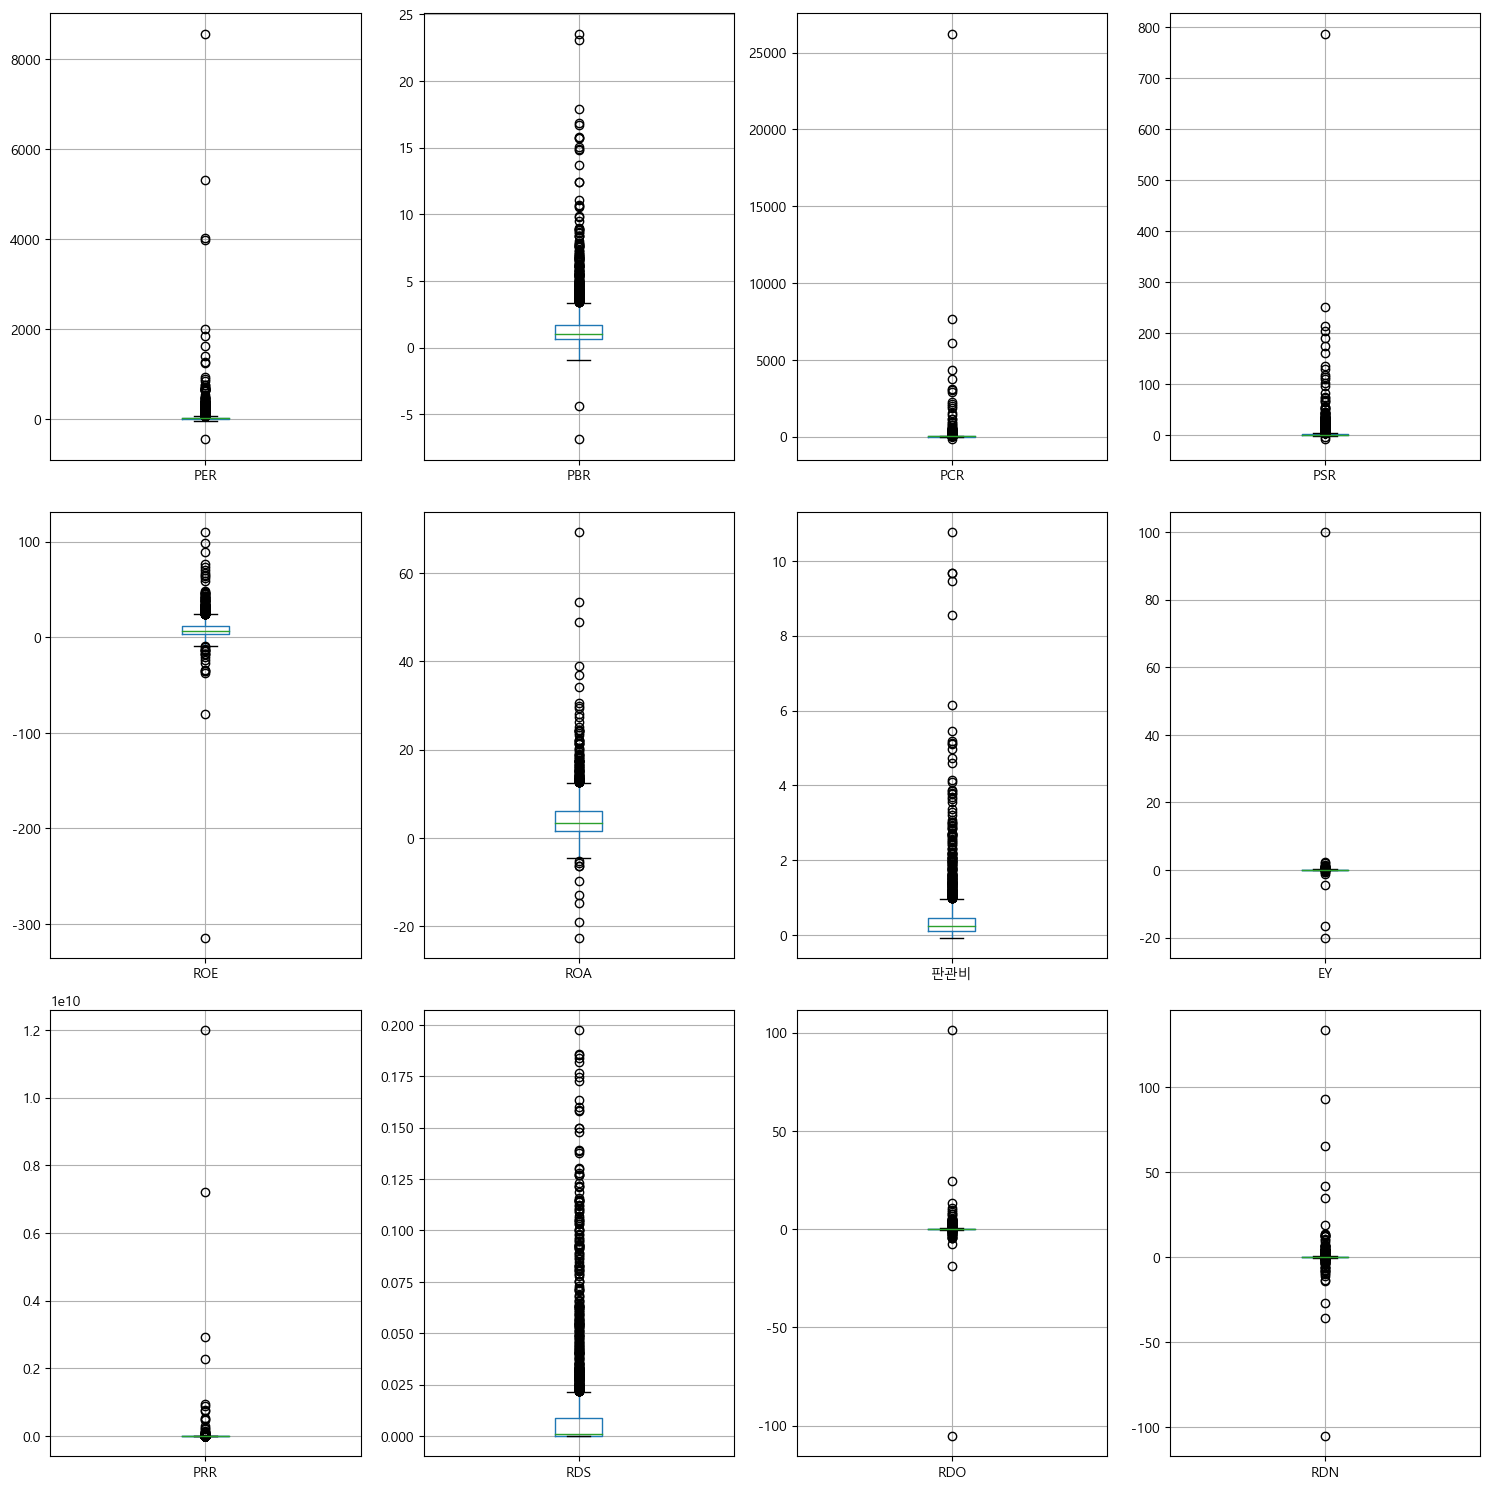

In [1585]:
## 윈저라이징 전 박스플롯

import matplotlib.pyplot as plt

kospi_num = kospi[["PER", "PBR", "PCR", "PSR", "ROE", "ROA", "판관비", "EY", 'PRR', 'RDS', 'RDO', 'RDN']]
kospi_num_col = kospi[["PER", "PBR", "PCR", "PSR", "ROE", "ROA", "판관비", "EY",'PRR', 'RDS', 'RDO', 'RDN']].columns

# 행과 열의 수 계산
n = len(kospi_num_col)
ncols = 4
nrows = n // ncols + (n % ncols > 0)

# 서브플롯 생성
fig, axes = plt.subplots(nrows, ncols, figsize=(15, nrows*5))

for i, var in enumerate(kospi_num_col):
    r, c = i // ncols, i % ncols
    ax = axes[r, c]
    kospi_num.boxplot(column=var, ax=ax)

# 빈 서브플롯 제거
if n % ncols > 0:
    for j in range(n % ncols, ncols):
        fig.delaxes(axes[nrows-1, j])

plt.tight_layout()  #  plt.tight_layout() 함수는 서브플롯 간의 간격을 적절하게 조절합니다.
plt.show()

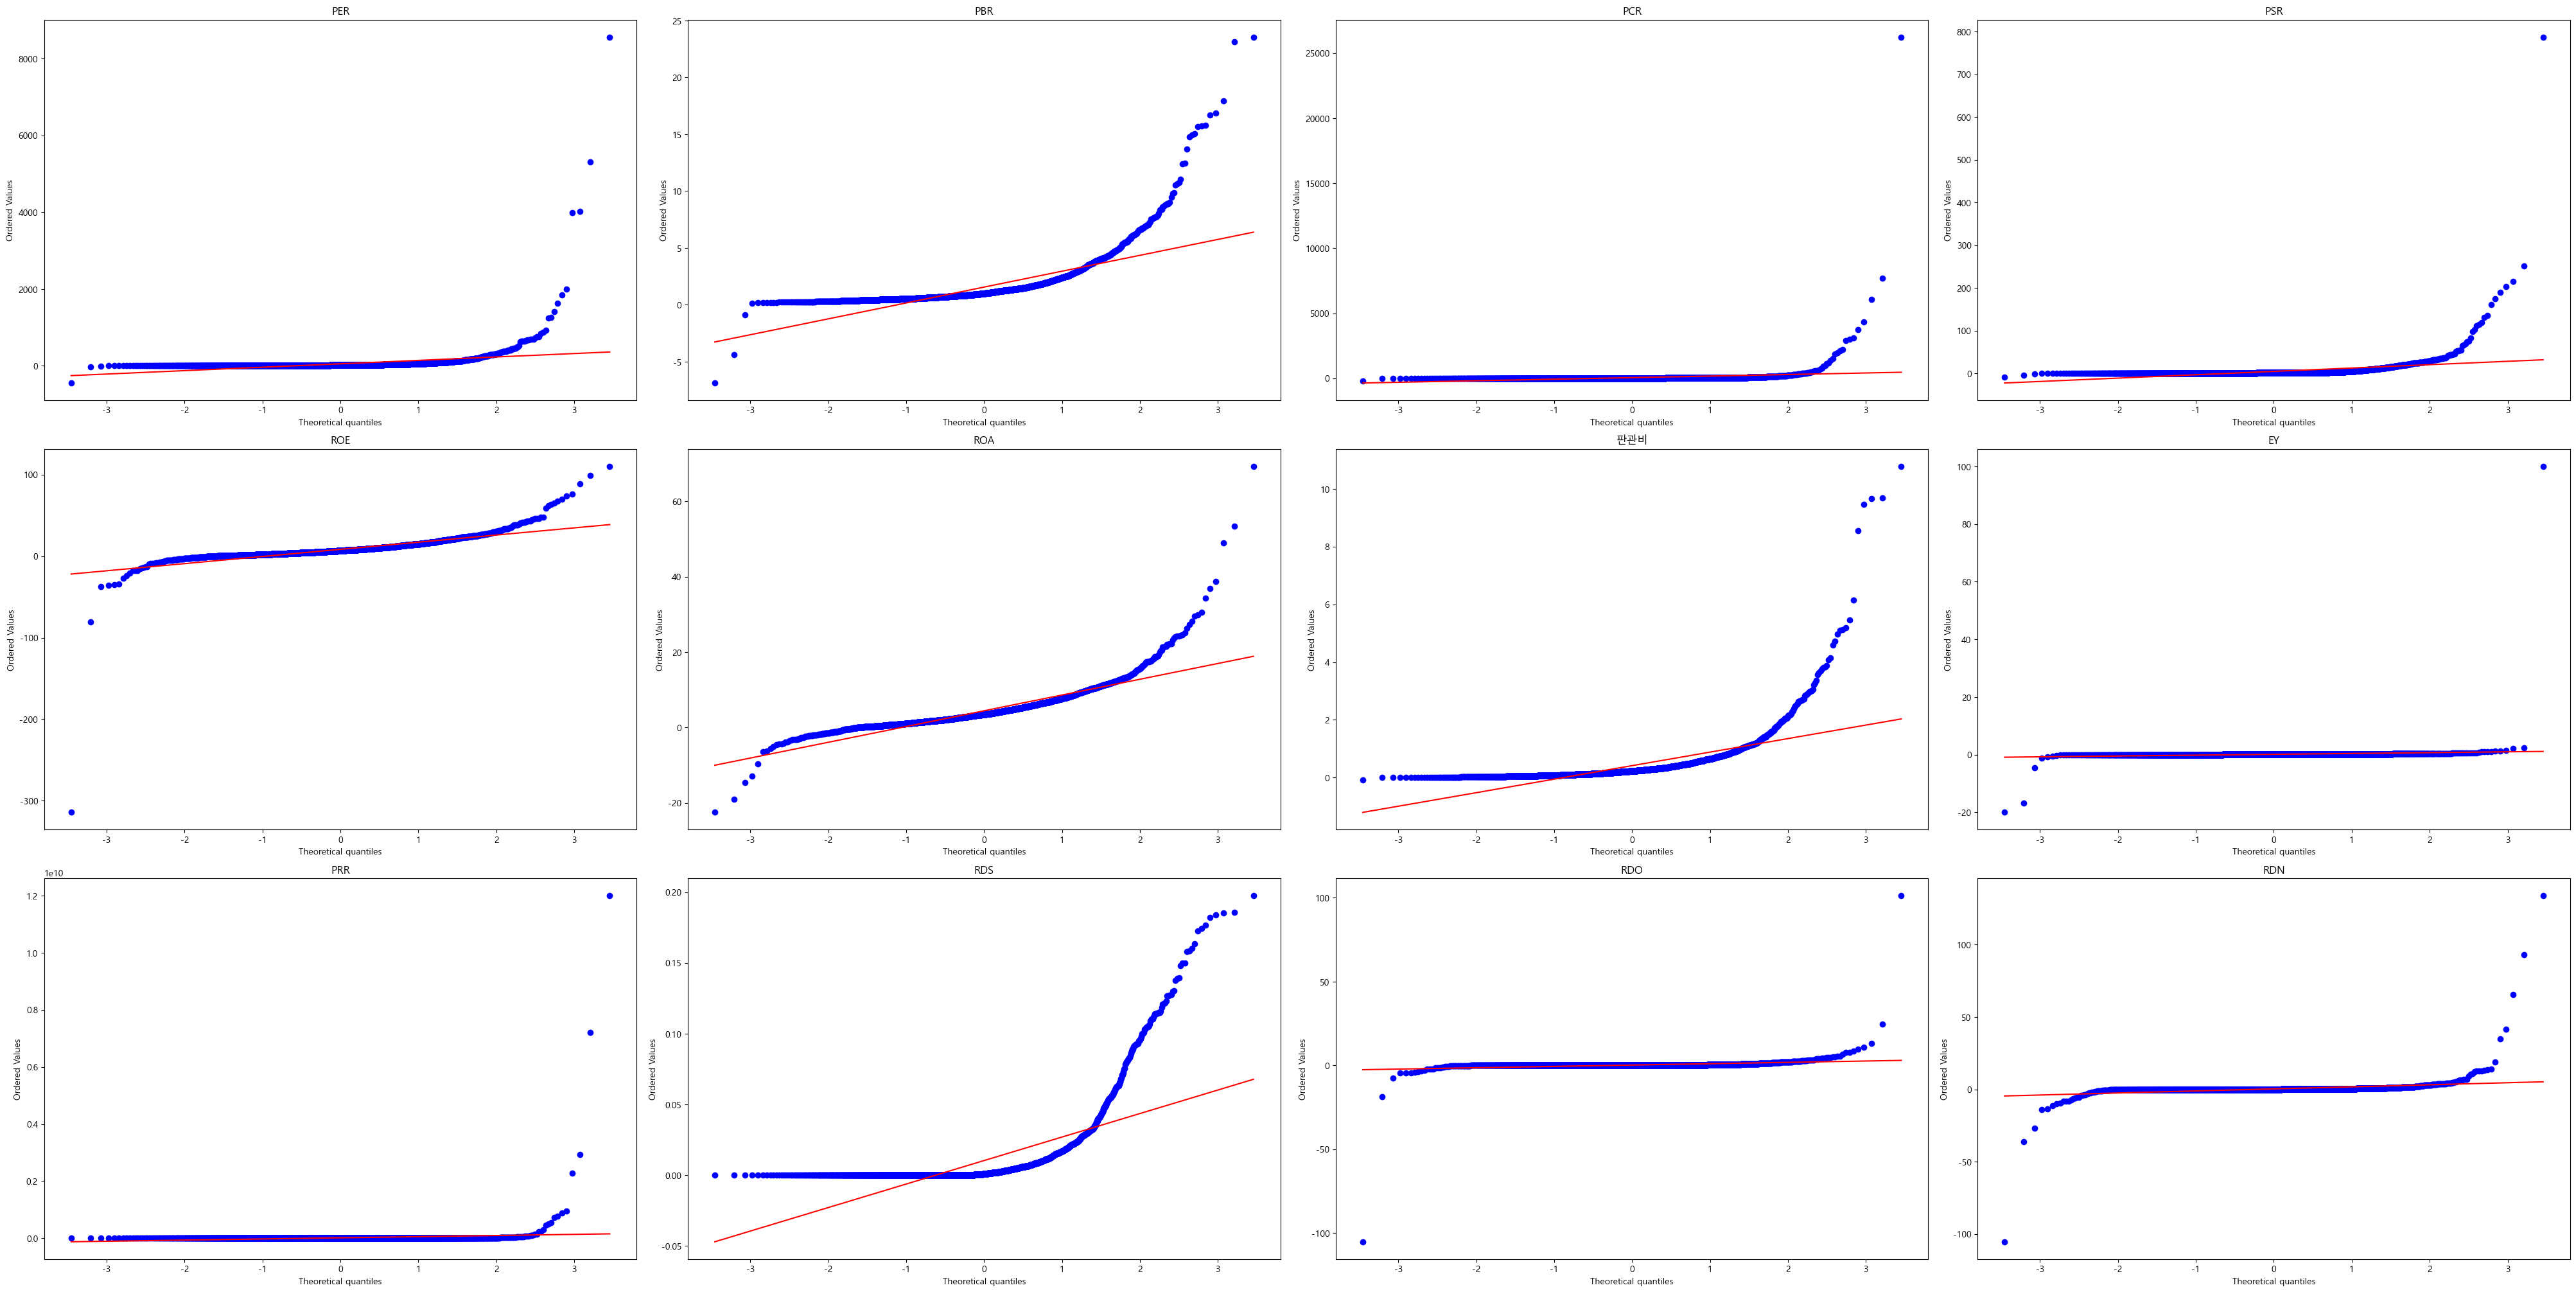

In [1586]:
# 윈저라이징 전 qqplot

from scipy import stats

def qqplot(df,ncols,nrows):
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams["font.family"] = 'Malgun Gothic'
   
    fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)
    fig.set_size_inches((40, 20))

    for ax, i in zip(axs.ravel(), df):
            stats.probplot(df[i], dist=stats.norm, plot=ax)
            ax.set_title(str(i))

    plt.show()

qqplot(kospi[["PER", "PBR", "PCR", "PSR", "ROE", "ROA", "판관비", "EY", 'PRR', 'RDS', 'RDO', 'RDN']],4,3)

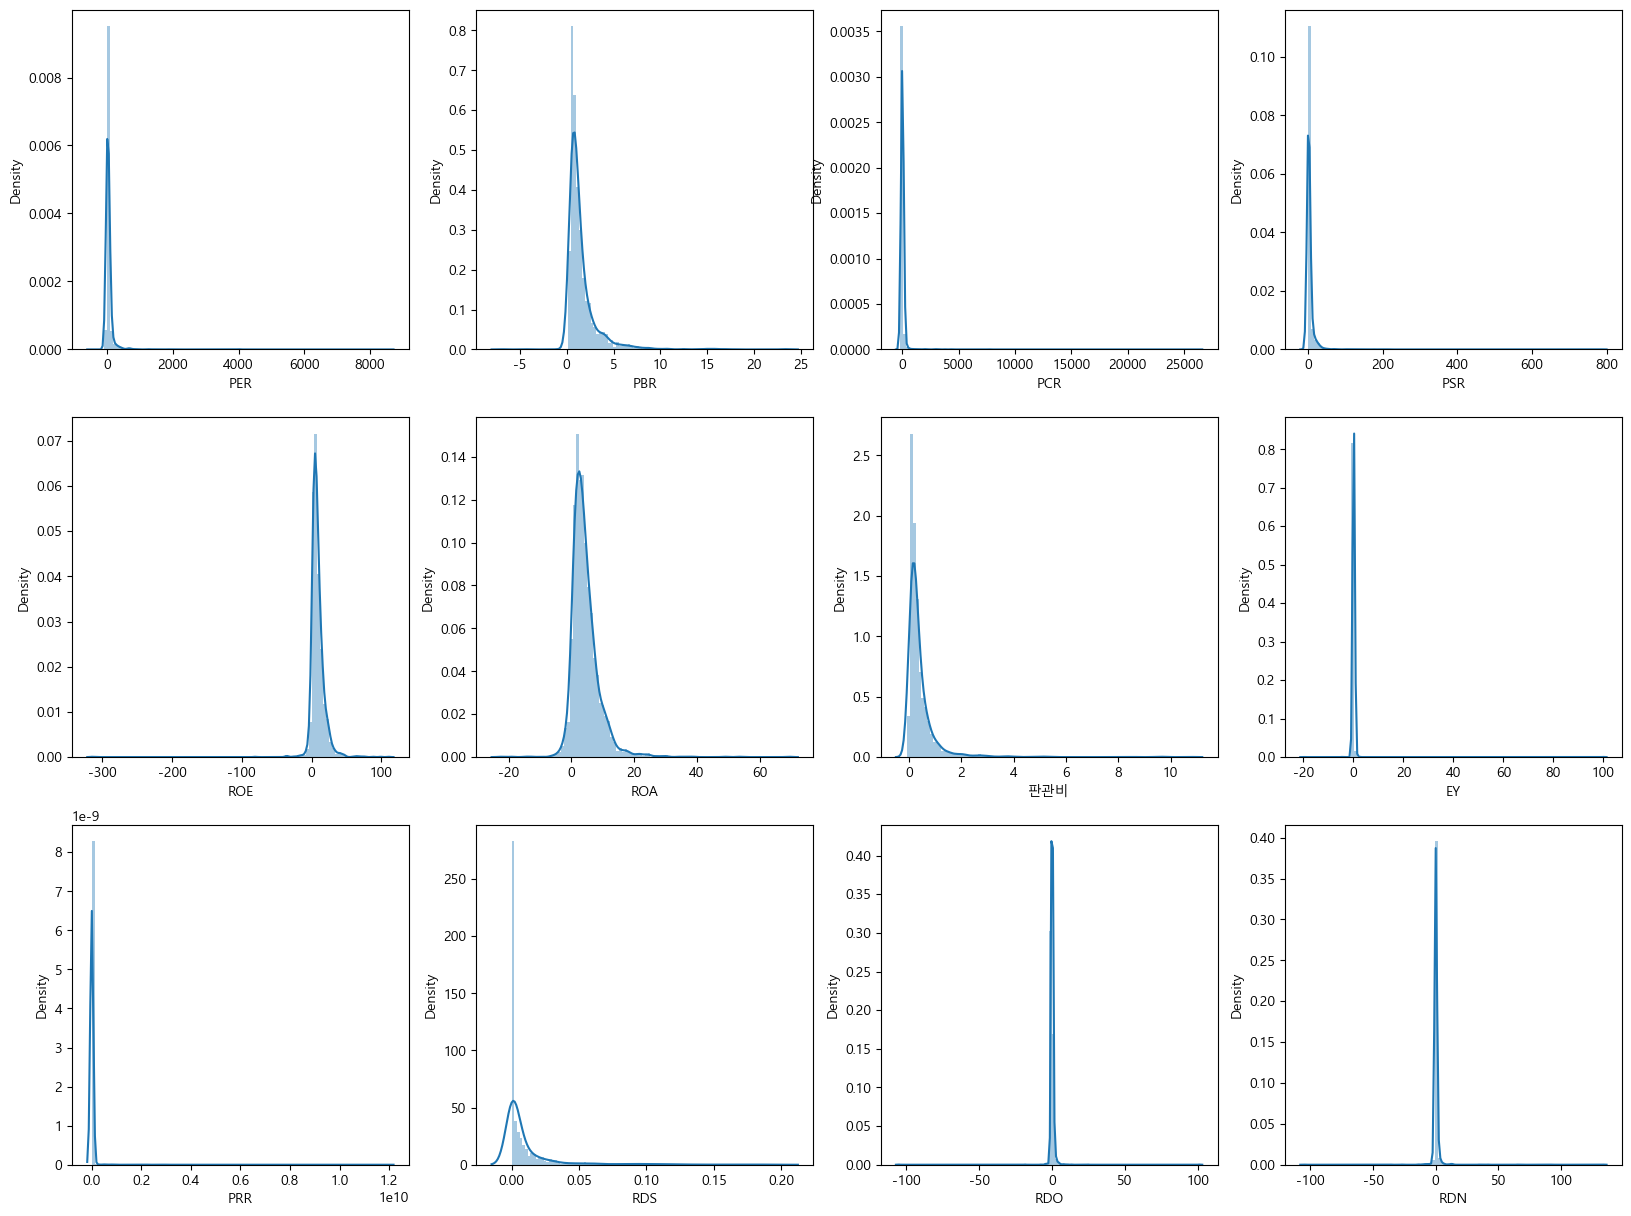

In [1587]:
# 윈저라이징 전 distplot

col_n = 4
row_n = 3

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))


for i,col in enumerate(kospi[["PER", "PBR", "PCR", "PSR", "ROE", "ROA", "판관비", "EY", 'PRR', 'RDS', 'RDO', 'RDN']].columns):
    sns.distplot(kospi[["PER", "PBR", "PCR", "PSR", "ROE", "ROA", "판관비", "EY", 'PRR', 'RDS', 'RDO', 'RDN']][col], bins=100, ax=ax[int(i/col_n),int(i%col_n)])

# 윈저라이징

In [1588]:
kospi['PER'] = winsorize(kospi['PER'], limits= (0.001, 0.009))
kospi['PBR'] = winsorize(kospi['PBR'], limits= (0.001, 0.009))
kospi['PCR'] = winsorize(kospi['PCR'], limits= (0.001, 0.009))
kospi['PSR'] = winsorize(kospi['PSR'], limits= (0, 0.01))
kospi['ROE'] = winsorize(kospi['ROE'], limits= (0.003, 0.007))
kospi['ROA'] = winsorize(kospi['ROA'], limits= (0.002, 0.008))
kospi['판관비'] = winsorize(kospi['판관비'], limits= (0, 0.01))
kospi['EY'] = winsorize(kospi['EY'], limits= (0.003, 0.007))
kospi['PRR'] = winsorize(kospi['PRR'], limits= (0, 0.01))
kospi['RDS'] = winsorize(kospi['RDS'], limits= (0, 0.01))
kospi['RDO'] = winsorize(kospi['RDO'], limits= (0.002, 0.008))
kospi['RDN'] = winsorize(kospi['RDN'], limits= (0.005, 0.005))


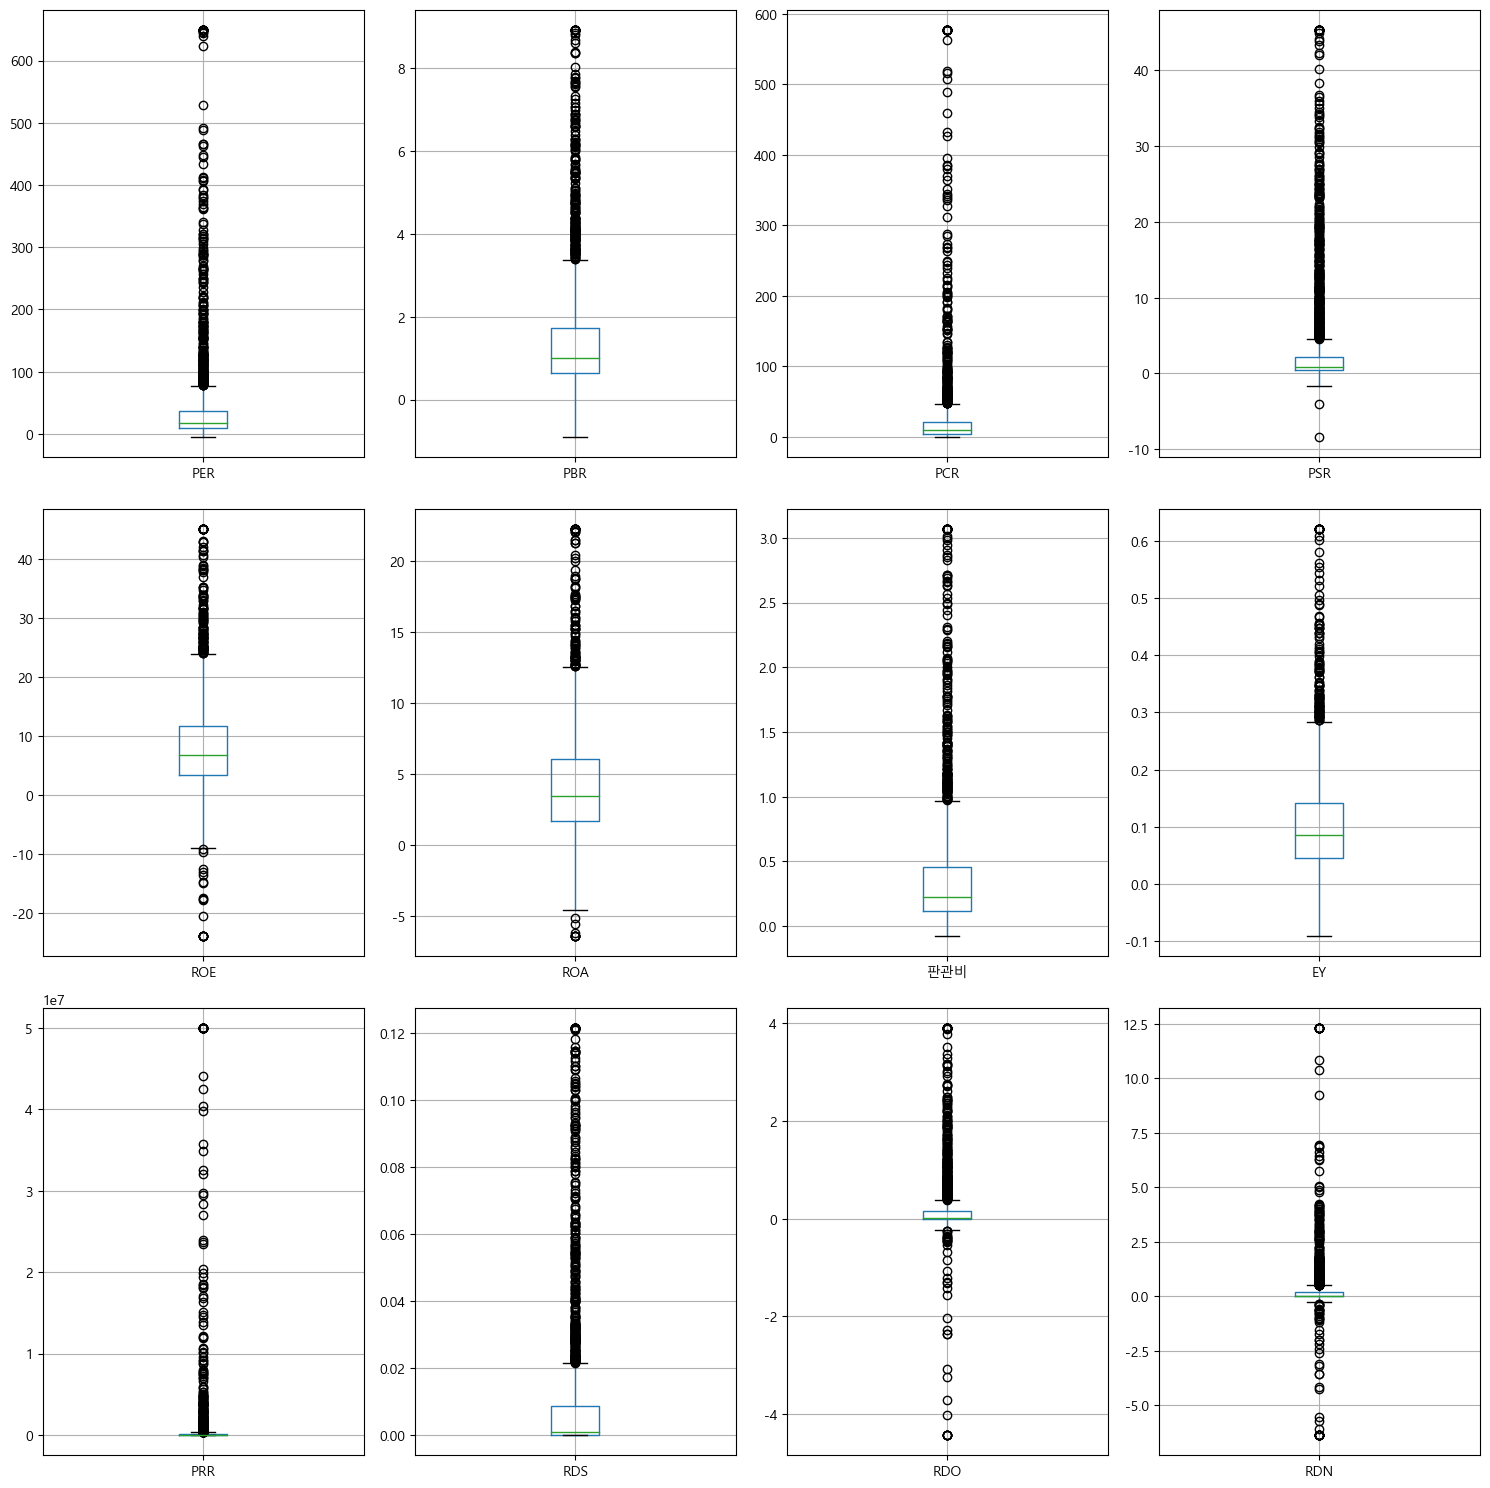

In [1589]:
## 윈저라이징 후 박스플롯

import matplotlib.pyplot as plt

kospi_num = kospi[["PER", "PBR", "PCR", "PSR", "ROE", "ROA", "판관비", "EY", 'PRR', 'RDS', 'RDO', 'RDN']]
kospi_num_col = kospi[["PER", "PBR", "PCR", "PSR", "ROE", "ROA", "판관비", "EY",'PRR', 'RDS', 'RDO', 'RDN']].columns

# 행과 열의 수 계산
n = len(kospi_num_col)
ncols = 4
nrows = n // ncols + (n % ncols > 0)

# 서브플롯 생성
fig, axes = plt.subplots(nrows, ncols, figsize=(15, nrows*5))

for i, var in enumerate(kospi_num_col):
    r, c = i // ncols, i % ncols
    ax = axes[r, c]
    kospi_num.boxplot(column=var, ax=ax)

# 빈 서브플롯 제거
if n % ncols > 0:
    for j in range(n % ncols, ncols):
        fig.delaxes(axes[nrows-1, j])

plt.tight_layout()  #  plt.tight_layout() 함수는 서브플롯 간의 간격을 적절하게 조절합니다.
plt.show()

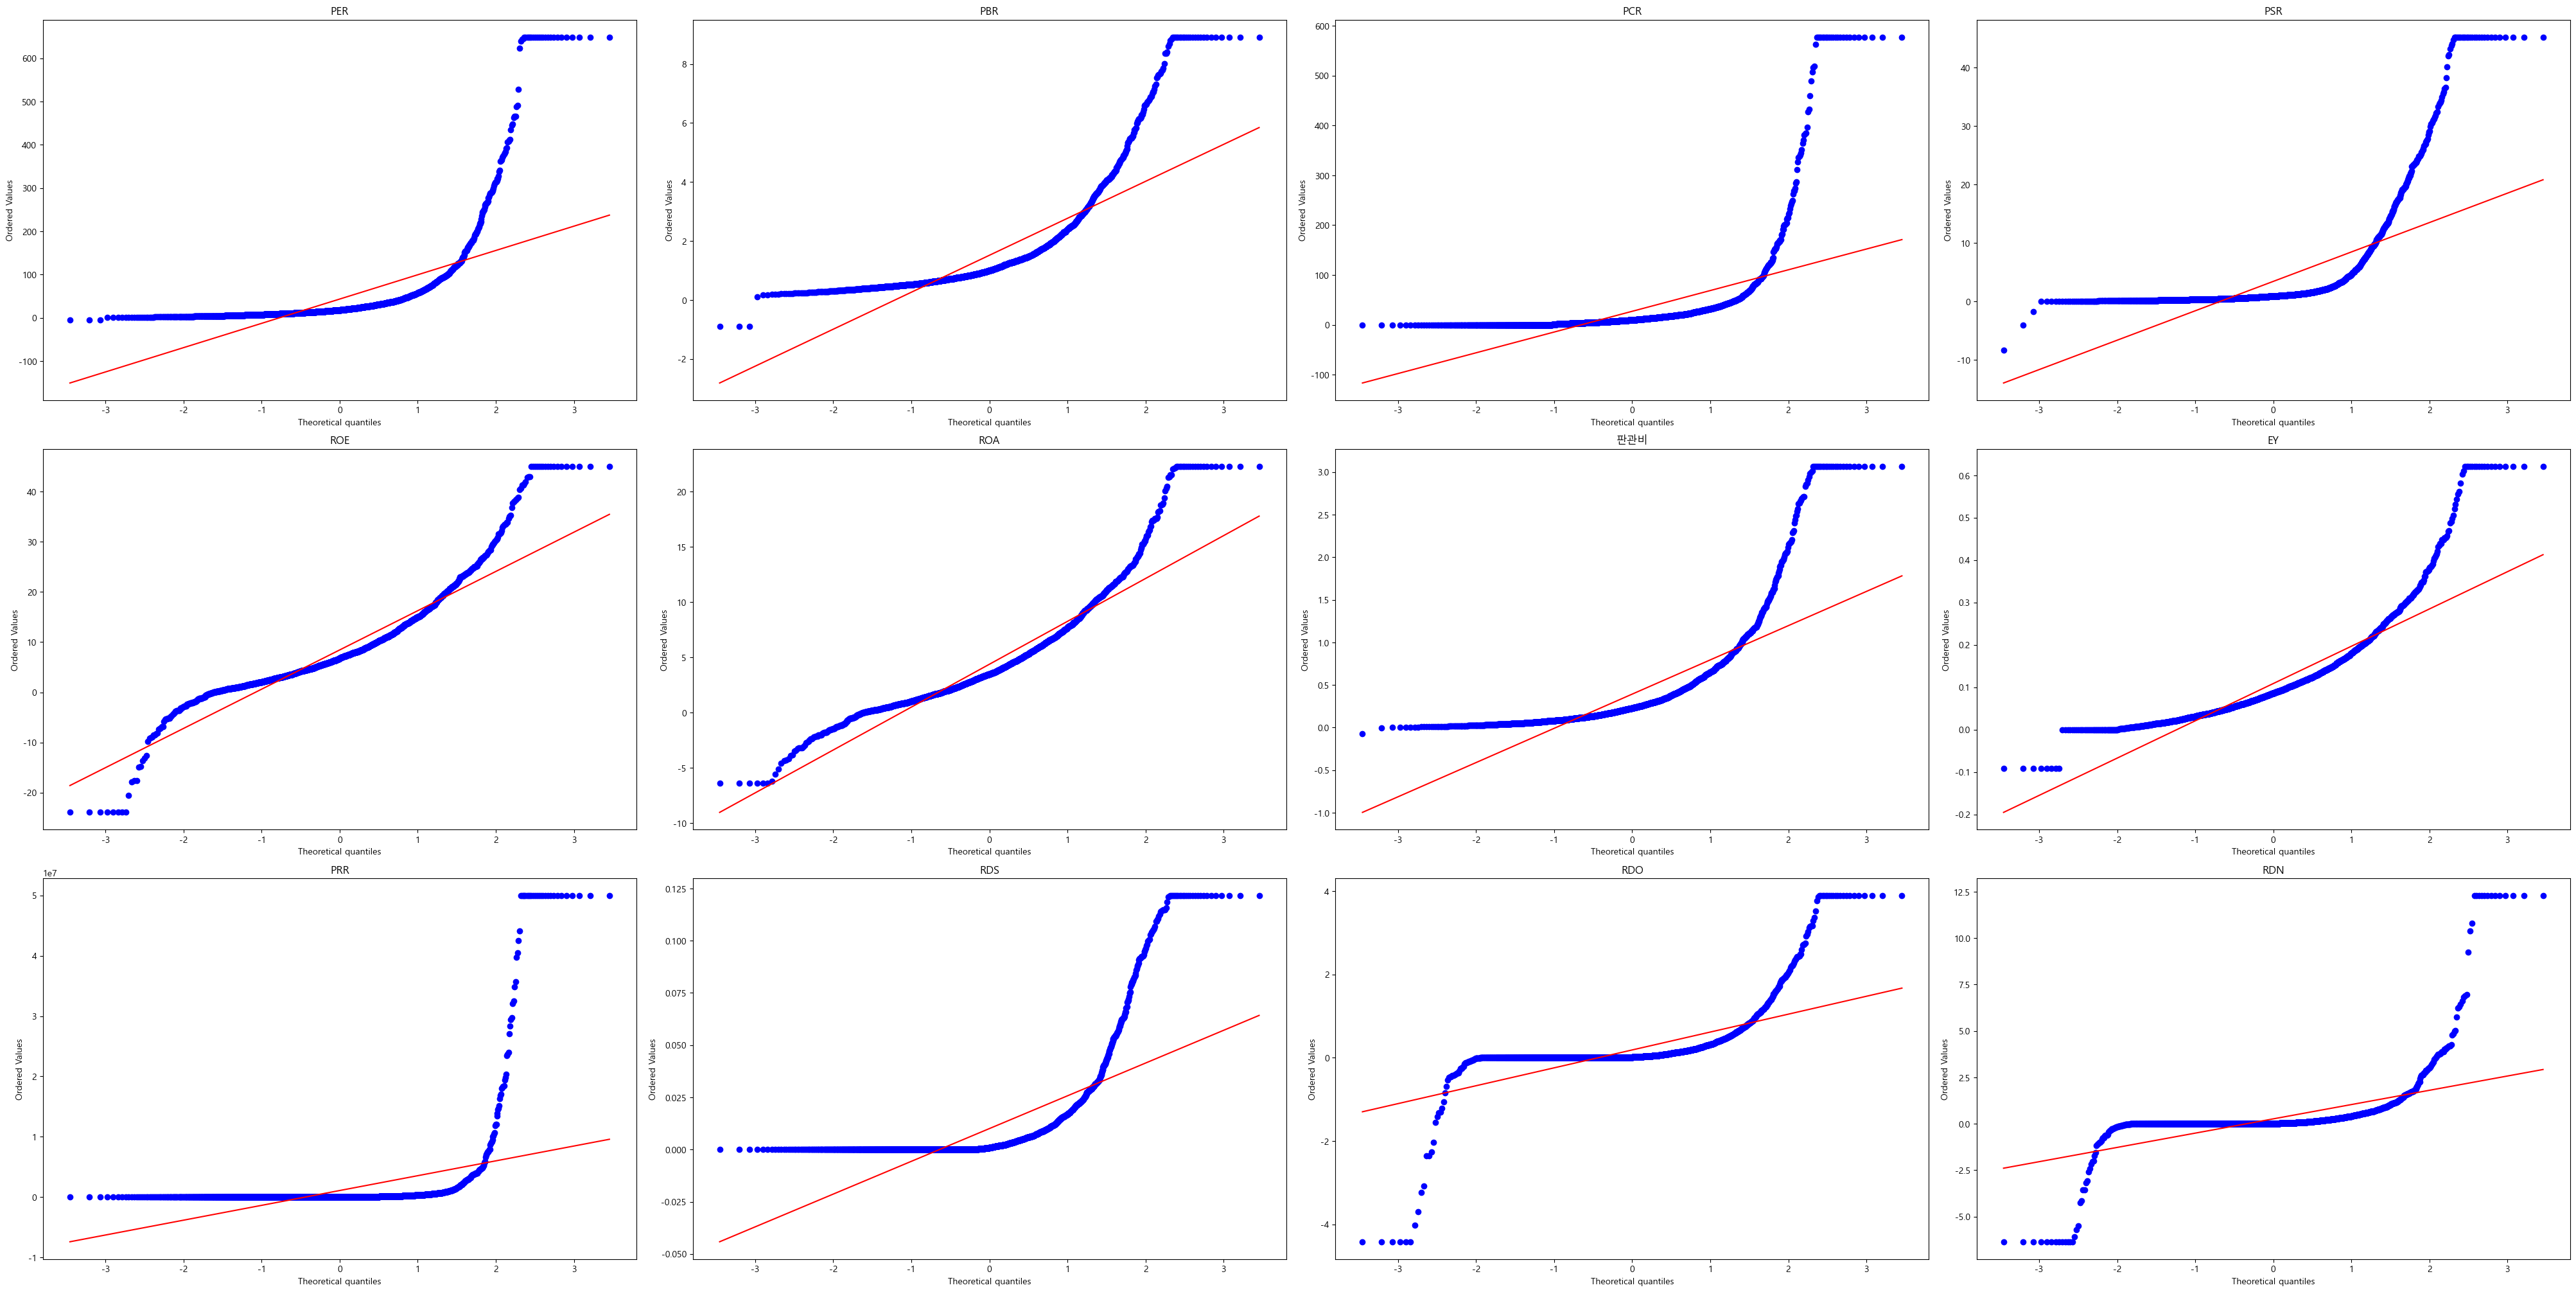

In [1590]:
# 윈저라이징 후 qqplot

from scipy import stats

def qqplot(df,ncols,nrows):
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams["font.family"] = 'Malgun Gothic'
   
    fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)
    fig.set_size_inches((40, 20))

    for ax, i in zip(axs.ravel(), df):
            stats.probplot(df[i], dist=stats.norm, plot=ax)
            ax.set_title(str(i))

    plt.show()

qqplot(kospi[["PER", "PBR", "PCR", "PSR", "ROE", "ROA", "판관비", "EY", 'PRR', 'RDS', 'RDO', 'RDN']],4,3)

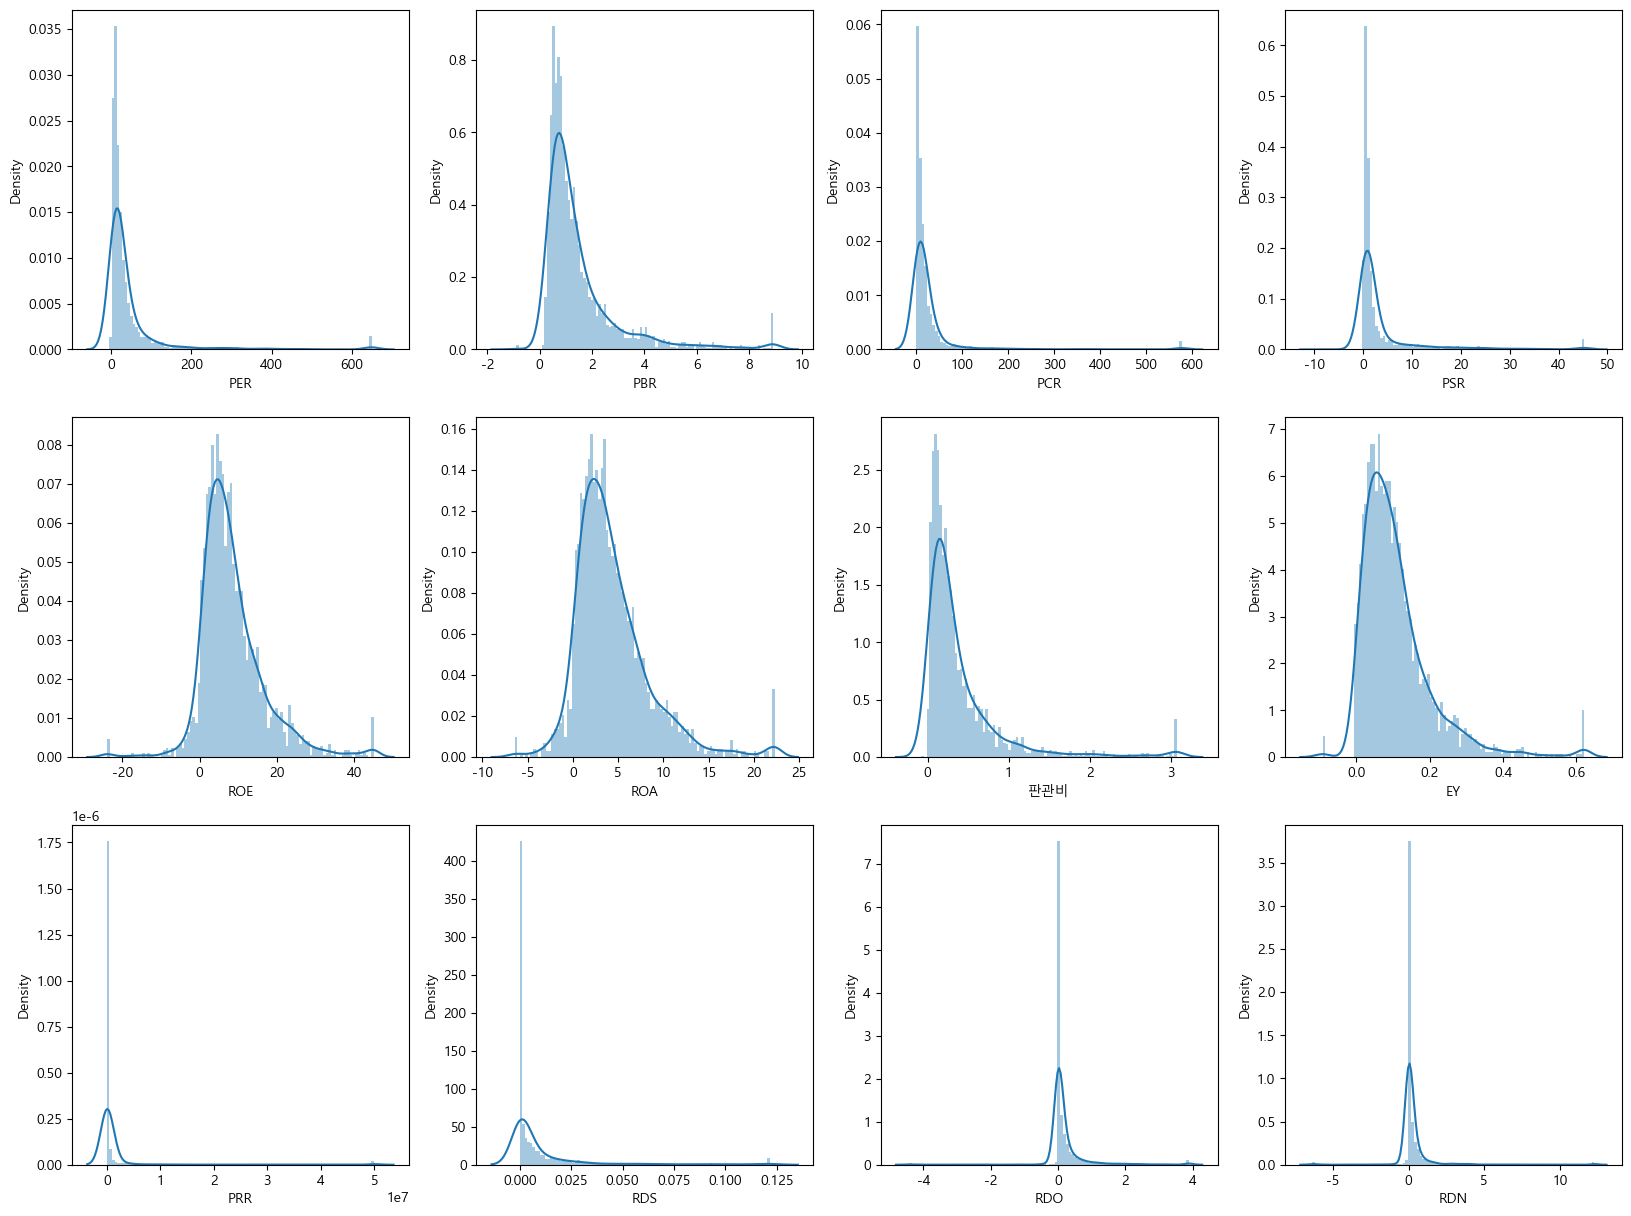

In [1591]:
# 윈저라이징 후 distplot

col_n = 4
row_n = 3

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))


for i,col in enumerate(kospi[["PER", "PBR", "PCR", "PSR", "ROE", "ROA", "판관비", "EY", 'PRR', 'RDS', 'RDO', 'RDN']].columns):
    sns.distplot(kospi[["PER", "PBR", "PCR", "PSR", "ROE", "ROA", "판관비", "EY", 'PRR', 'RDS', 'RDO', 'RDN']][col], bins=100, ax=ax[int(i/col_n),int(i%col_n)])

In [1592]:
kospi_col = kospi[['PER', 'PBR', 'PCR', 'PSR', 'ROE', 'ROA', '판관비', 'EY', 'PRR', 'RDS',
       'RDO', 'RDN']].columns

In [1593]:
kospi_col

Index(['PER', 'PBR', 'PCR', 'PSR', 'ROE', 'ROA', '판관비', 'EY', 'PRR', 'RDS',
       'RDO', 'RDN'],
      dtype='object')

In [1594]:
kospi[kospi_col].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2520 entries, 0 to 3442
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PER     2520 non-null   float64
 1   PBR     2520 non-null   float64
 2   PCR     2520 non-null   float64
 3   PSR     2520 non-null   float64
 4   ROE     2520 non-null   float64
 5   ROA     2520 non-null   float64
 6   판관비     2520 non-null   float64
 7   EY      2520 non-null   float64
 8   PRR     2520 non-null   float64
 9   RDS     2520 non-null   float64
 10  RDO     2520 non-null   float64
 11  RDN     2520 non-null   float64
dtypes: float64(12)
memory usage: 255.9 KB


In [1595]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# standard 스케일링
scaler = StandardScaler()
kospi[kospi_col] = scaler.fit_transform(kospi[kospi_col])

print(kospi.head())

     회사명    종목코드  회계년도       종가       ROE          시가총액       PER       PBR   
0  DB하이텍  000990  2018  10850.0  1.047656  4.817247e+11 -0.422966 -0.102793  \
1  DB하이텍  000990  2019  27600.0  1.081453  1.225401e+12 -0.423839 -0.059488   
2  DB하이텍  000990  2020  51000.0  1.765852  2.264328e+12 -0.402431  0.296942   
3  DB하이텍  000990  2021  72700.0  3.006702  3.227777e+12 -0.402373  0.766631   
4  DB하이텍  000990  2022  37150.0  3.897507  1.649408e+12 -0.451123  0.130386   

        PCR       PSR       PRR       RDS       RDO       RDN       ROA   
0 -0.330934 -0.332123 -0.187528  3.129084  0.452043  0.267248  0.921161  \
1 -0.308201 -0.325966 -0.185292  2.655557  0.191781  0.205179  1.278786   
2 -0.316410 -0.254813 -0.182456  2.384364  0.094742  0.068176  2.369315   
3 -0.281540 -0.152189 -0.180473  1.946054 -0.039200 -0.048378  3.918026   
4 -0.332056 -0.254129 -0.185392  1.617175 -0.137729 -0.099635  4.361654   

        판관비        EY     수정종가        수익률  
0 -0.359154  1.639569  14150.0

In [1596]:
kospi

,회사명,종목코드,회계년도,종가,ROE,시가총액,PER,PBR,PCR,PSR,PRR,RDS,RDO,RDN,ROA,판관비,EY,수정종가,수익률
0,DB하이텍,000990,2018,10850.0,1.047656,4.817247e+11,-0.422966,-0.102793,-0.330934,-0.332123,-0.187528,3.129084,0.452043,0.267248,0.921161,-0.359154,1.639569,14150.0,-3.046683
1,DB하이텍,000990,2019,27600.0,1.081453,1.225401e+12,-0.423839,-0.059488,-0.308201,-0.325966,-0.185292,2.655557,0.191781,0.205179,1.278786,-0.598965,0.800507,13000.0,-0.812721
2,DB하이텍,000990,2020,51000.0,1.765852,2.264328e+12,-0.402431,0.296942,-0.316410,-0.254813,-0.182456,2.384364,0.094742,0.068176,2.369315,-0.677220,0.382858,20900.0,6.076923
3,DB하이텍,000990,2021,72700.0,3.006702,3.227777e+12,-0.402373,0.766631,-0.281540,-0.152189,-0.180473,1.946054,-0.039200,-0.048378,3.918026,-0.698407,0.613026,57700.0,17.607656
4,DB하이텍,000990,2022,37150.0,3.897507,1.649408e+12,-0.451123,0.130386,-0.332056,-0.254129,-0.185392,1.617175,-0.137729,-0.099635,4.361654,-0.583749,4.473671,73400.0,2.720971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3434,효성티앤씨,298020,2022,350000.0,-0.912598,1.514689e+12,-0.431402,0.600075,-0.274805,-0.424485,-0.176832,-0.348097,-0.022350,0.653470,-0.953581,-0.376577,0.110018,462500.0,-1.711470
3435,효성화학,298000,2020,156500.0,-1.345930,4.992547e+11,-0.409935,-0.489204,-0.361173,-0.442958,-0.184854,0.048722,0.234392,-1.559665,-1.178783,-0.414788,0.779251,87100.0,-4.034247
3436,효성화학,298000,2021,303500.0,0.861769,9.682032e+11,-0.416683,0.130386,-0.335003,-0.406697,-0.181470,-0.052962,-0.062123,0.034656,-0.500575,-0.575194,1.024514,298000.0,24.213548
3441,흥아해운,003280,2021,2700.0,4.157023,6.491472e+11,0.002637,3.248322,-0.383625,0.683859,-0.189092,-0.456484,-0.297140,-0.206105,0.557083,-0.759238,-0.978576,1555.0,0.000000


In [1597]:
kospi.reset_index(drop=True)

,회사명,종목코드,회계년도,종가,ROE,시가총액,PER,PBR,PCR,PSR,PRR,RDS,RDO,RDN,ROA,판관비,EY,수정종가,수익률
0,DB하이텍,000990,2018,10850.0,1.047656,4.817247e+11,-0.422966,-0.102793,-0.330934,-0.332123,-0.187528,3.129084,0.452043,0.267248,0.921161,-0.359154,1.639569,14150.0,-3.046683
1,DB하이텍,000990,2019,27600.0,1.081453,1.225401e+12,-0.423839,-0.059488,-0.308201,-0.325966,-0.185292,2.655557,0.191781,0.205179,1.278786,-0.598965,0.800507,13000.0,-0.812721
2,DB하이텍,000990,2020,51000.0,1.765852,2.264328e+12,-0.402431,0.296942,-0.316410,-0.254813,-0.182456,2.384364,0.094742,0.068176,2.369315,-0.677220,0.382858,20900.0,6.076923
3,DB하이텍,000990,2021,72700.0,3.006702,3.227777e+12,-0.402373,0.766631,-0.281540,-0.152189,-0.180473,1.946054,-0.039200,-0.048378,3.918026,-0.698407,0.613026,57700.0,17.607656
4,DB하이텍,000990,2022,37150.0,3.897507,1.649408e+12,-0.451123,0.130386,-0.332056,-0.254129,-0.185392,1.617175,-0.137729,-0.099635,4.361654,-0.583749,4.473671,73400.0,2.720971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,효성티앤씨,298020,2022,350000.0,-0.912598,1.514689e+12,-0.431402,0.600075,-0.274805,-0.424485,-0.176832,-0.348097,-0.022350,0.653470,-0.953581,-0.376577,0.110018,462500.0,-1.711470
2516,효성화학,298000,2020,156500.0,-1.345930,4.992547e+11,-0.409935,-0.489204,-0.361173,-0.442958,-0.184854,0.048722,0.234392,-1.559665,-1.178783,-0.414788,0.779251,87100.0,-4.034247
2517,효성화학,298000,2021,303500.0,0.861769,9.682032e+11,-0.416683,0.130386,-0.335003,-0.406697,-0.181470,-0.052962,-0.062123,0.034656,-0.500575,-0.575194,1.024514,298000.0,24.213548
2518,흥아해운,003280,2021,2700.0,4.157023,6.491472e+11,0.002637,3.248322,-0.383625,0.683859,-0.189092,-0.456484,-0.297140,-0.206105,0.557083,-0.759238,-0.978576,1555.0,0.000000


In [1598]:
len(kospi["회사명"].unique())

673

In [1599]:
# kospi.to_csv('./kospi(18~22).csv', index=False)

In [1600]:
kospi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2520 entries, 0 to 3442
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   회사명     2520 non-null   object 
 1   종목코드    2520 non-null   object 
 2   회계년도    2520 non-null   int32  
 3   종가      2520 non-null   float64
 4   ROE     2520 non-null   float64
 5   시가총액    2520 non-null   float64
 6   PER     2520 non-null   float64
 7   PBR     2520 non-null   float64
 8   PCR     2520 non-null   float64
 9   PSR     2520 non-null   float64
 10  PRR     2520 non-null   float64
 11  RDS     2520 non-null   float64
 12  RDO     2520 non-null   float64
 13  RDN     2520 non-null   float64
 14  ROA     2520 non-null   float64
 15  판관비     2520 non-null   float64
 16  EY      2520 non-null   float64
 17  수정종가    2520 non-null   float64
 18  수익률     2520 non-null   float64
dtypes: float64(16), int32(1), object(2)
memory usage: 383.9+ KB


In [1601]:
kospi[["회계년도", 'PER', 'PBR', 'PCR', 'PSR', 'ROE', 'ROA', '판관비', 'EY', 'PRR', 'RDS',
       'RDO', 'RDN', "수익률"]].columns

Index(['회계년도', 'PER', 'PBR', 'PCR', 'PSR', 'ROE', 'ROA', '판관비', 'EY', 'PRR',
       'RDS', 'RDO', 'RDN', '수익률'],
      dtype='object')

In [1602]:
kospi_col_ml = kospi[["회계년도", 'PER', 'PBR', 'PCR', 'PSR', 'ROE', 'ROA', '판관비', 'EY', 'PRR', 'RDS',
       'RDO', 'RDN', "수익률"]].columns
kospi_ml = kospi[kospi_col_ml]
kospi_ml

,회계년도,PER,PBR,PCR,PSR,ROE,ROA,판관비,EY,PRR,RDS,RDO,RDN,수익률
0,2018,-0.422966,-0.102793,-0.330934,-0.332123,1.047656,0.921161,-0.359154,1.639569,-0.187528,3.129084,0.452043,0.267248,-3.046683
1,2019,-0.423839,-0.059488,-0.308201,-0.325966,1.081453,1.278786,-0.598965,0.800507,-0.185292,2.655557,0.191781,0.205179,-0.812721
2,2020,-0.402431,0.296942,-0.316410,-0.254813,1.765852,2.369315,-0.677220,0.382858,-0.182456,2.384364,0.094742,0.068176,6.076923
3,2021,-0.402373,0.766631,-0.281540,-0.152189,3.006702,3.918026,-0.698407,0.613026,-0.180473,1.946054,-0.039200,-0.048378,17.607656
4,2022,-0.451123,0.130386,-0.332056,-0.254129,3.897507,4.361654,-0.583749,4.473671,-0.185392,1.617175,-0.137729,-0.099635,2.720971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3434,2022,-0.431402,0.600075,-0.274805,-0.424485,-0.912598,-0.953581,-0.376577,0.110018,-0.176832,-0.348097,-0.022350,0.653470,-1.711470
3435,2020,-0.409935,-0.489204,-0.361173,-0.442958,-1.345930,-1.178783,-0.414788,0.779251,-0.184854,0.048722,0.234392,-1.559665,-4.034247
3436,2021,-0.416683,0.130386,-0.335003,-0.406697,0.861769,-0.500575,-0.575194,1.024514,-0.181470,-0.052962,-0.062123,0.034656,24.213548
3441,2021,0.002637,3.248322,-0.383625,0.683859,4.157023,0.557083,-0.759238,-0.978576,-0.189092,-0.456484,-0.297140,-0.206105,0.000000


In [1603]:
train = kospi_ml[kospi_ml["회계년도"] < 2022]
test = kospi_ml[kospi_ml["회계년도"] == 2022]

In [1604]:
train

,회계년도,PER,PBR,PCR,PSR,ROE,ROA,판관비,EY,PRR,RDS,RDO,RDN,수익률
0,2018,-0.422966,-0.102793,-0.330934,-0.332123,1.047656,0.921161,-0.359154,1.639569,-0.187528,3.129084,0.452043,0.267248,-3.046683
1,2019,-0.423839,-0.059488,-0.308201,-0.325966,1.081453,1.278786,-0.598965,0.800507,-0.185292,2.655557,0.191781,0.205179,-0.812721
2,2020,-0.402431,0.296942,-0.316410,-0.254813,1.765852,2.369315,-0.677220,0.382858,-0.182456,2.384364,0.094742,0.068176,6.076923
3,2021,-0.402373,0.766631,-0.281540,-0.152189,3.006702,3.918026,-0.698407,0.613026,-0.180473,1.946054,-0.039200,-0.048378,17.607656
7,2020,-0.419243,0.197008,-0.351631,-0.425854,2.325924,-0.191937,-0.524728,-0.550963,-0.137698,-0.401981,-0.233989,-0.185900,-6.700984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3432,2020,-0.387713,-0.092800,-0.338160,-0.445010,2.010883,0.389502,-0.276332,-0.051969,-0.178570,-0.325466,-0.207645,-0.137273,-4.189944
3433,2021,-0.400220,2.169036,-0.210046,-0.396435,4.416539,4.361654,-0.539044,0.423403,-0.167679,-0.361028,-0.276808,-0.192162,43.653846
3435,2020,-0.409935,-0.489204,-0.361173,-0.442958,-1.345930,-1.178783,-0.414788,0.779251,-0.184854,0.048722,0.234392,-1.559665,-4.034247
3436,2021,-0.416683,0.130386,-0.335003,-0.406697,0.861769,-0.500575,-0.575194,1.024514,-0.181470,-0.052962,-0.062123,0.034656,24.213548


In [1605]:
# X_train_col = train.drop(["회계년도", "수익률"], axis = 1).columns
# X_test_col = test.drop(["회계년도", "수익률"], axis = 1).columns

In [1606]:
# test["수익률"]
# train["수익률"]

In [1607]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score

# X_train = train[X_train_col]
# X_test = test[X_test_col]


# y_train = train[["수익률"]]
# y_test = test[["수익률"]]


# # 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
# rf = RandomForestRegressor(random_state=0)
# rf.fit(X_train, y_train)
# pred = rf.predict(X_test)
# print(pred)
# # accuracy = accuracy_score(y_test, pred)
# # print("랜덤 포레스트 정확도 : {0: .4f}".format(accuracy))

In [1608]:
# 전체 피쳐 랜덤포레스트 리그레션
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

y_target = kospi_ml["수익률"]
X_data = kospi_ml.drop(["회계년도", "수익률"], axis = 1)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(" 5 folds 의 개별 Negative MSE scores : ", np.round(neg_mse_scores, 3))
print(" 5 folds 의 개별 RMSE score : ", np.round(rmse_scores, 3))
print(" 5 folds 의 개별 평균 RMSE : {0:.3f}".format(avg_rmse))

 5 folds 의 개별 Negative MSE scores :  [-61.976 -39.293 -48.742 -58.063 -54.706]
 5 folds 의 개별 RMSE score :  [7.873 6.268 6.982 7.62  7.396]
 5 folds 의 개별 평균 RMSE : 7.228


<Axes: >

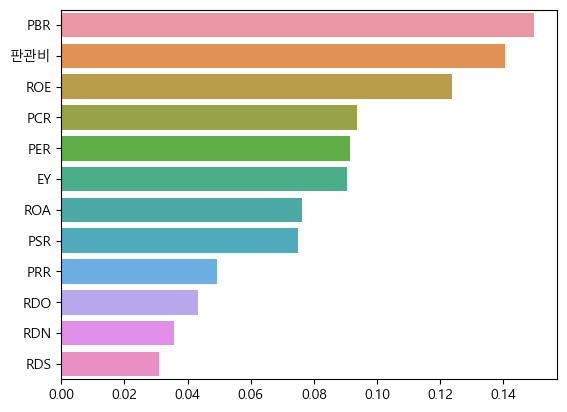

In [1609]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습한다.
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

In [1630]:
# 밸류팩터 랜덤포레스트 리그레션
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

y_target = kospi_ml["수익률"]
X_data = kospi_ml[["PER", "PBR", "PSR", "PCR", "EY"]]

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(" 5 folds 의 개별 Negative MSE scores : ", np.round(neg_mse_scores, 3))
print(" 5 folds 의 개별 RMSE score : ", np.round(rmse_scores, 3))
print(" 5 folds 의 개별 평균 RMSE : {0:.3f}".format(avg_rmse))

 5 folds 의 개별 Negative MSE scores :  [-63.578 -39.846 -53.303 -54.82  -61.141]
 5 folds 의 개별 RMSE score :  [7.974 6.312 7.301 7.404 7.819]
 5 folds 의 개별 평균 RMSE : 7.362


<Axes: >

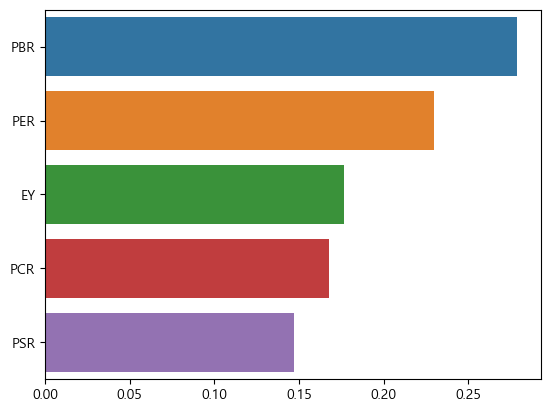

In [1631]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습한다.
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

In [1641]:
rf_reg.feature_importances_

array([0.22976052, 0.27900181, 0.14679538, 0.16793026, 0.17651202])

In [1620]:
# RND 팩터 랜덤포레스트 리그레션
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

y_target = kospi_ml["수익률"]
X_data = kospi_ml[["PRR", "RDS", "RDO", "RDN"]]

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(" 5 folds 의 개별 Negative MSE scores : ", np.round(neg_mse_scores, 3))
print(" 5 folds 의 개별 RMSE score : ", np.round(rmse_scores, 3))
print(" 5 folds 의 개별 평균 RMSE : {0:.3f}".format(avg_rmse))

 5 folds 의 개별 Negative MSE scores :  [-67.486 -46.595 -58.188 -63.111 -58.859]
 5 folds 의 개별 RMSE score :  [8.215 6.826 7.628 7.944 7.672]
 5 folds 의 개별 평균 RMSE : 7.657


<Axes: >

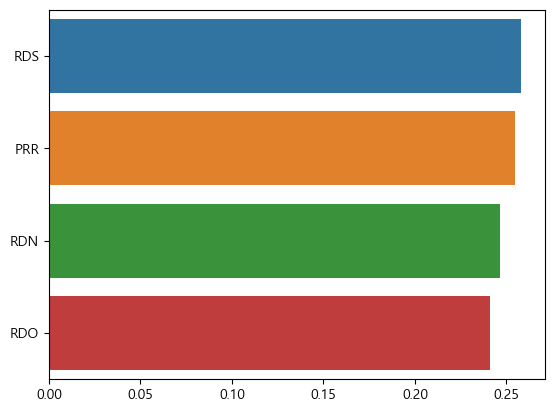

In [1621]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습한다.
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

<Axes: >

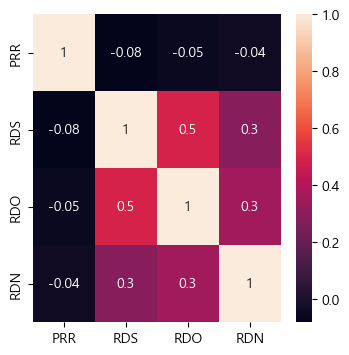

In [1622]:
corr = X_data.corr()
plt.figure(figsize = (4, 4))
sns.heatmap(corr, annot = True, fmt = ".1g")

In [1623]:
# 퀄리티 팩터 랜덤포레스트 리그레션
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

y_target = kospi_ml["수익률"]
X_data = kospi_ml[["ROE", "ROA", "판관비"]]

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(" 5 folds 의 개별 Negative MSE scores : ", np.round(neg_mse_scores, 3))
print(" 5 folds 의 개별 RMSE score : ", np.round(rmse_scores, 3))
print(" 5 folds 의 개별 평균 RMSE : {0:.3f}".format(avg_rmse))

 5 folds 의 개별 Negative MSE scores :  [-65.499 -43.131 -58.073 -60.806 -55.113]
 5 folds 의 개별 RMSE score :  [8.093 6.567 7.621 7.798 7.424]
 5 folds 의 개별 평균 RMSE : 7.501


<Axes: >

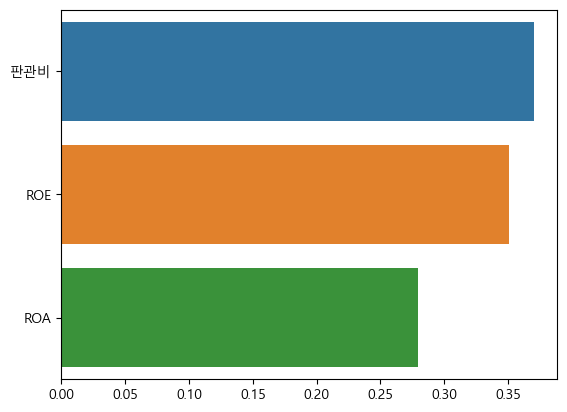

In [1624]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습한다.
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

<Axes: >

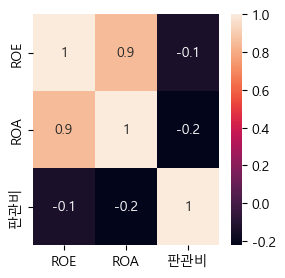

In [1635]:
X_data = kospi_ml[["ROE", "ROA", "판관비"]]
corr = X_data.corr()
plt.figure(figsize = (3, 3))
sns.heatmap(corr, annot = True, fmt = ".1g")

In [ ]:
from sklearn.decomposition import PCA

# BILL_AMT1 ~ BILL_AMT6 까지 6개의 속성명 생성
cols_bill = ["BILL_AMT" + str(i) for i in range(1, 7)]
print("대상 속성명 : ", cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산 위해 fit() 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components = 2)
pca.fit(df_cols_scaled)

print("PCA Component별 변동성 : ", pca.explained_variance_ratio_)

<Axes: >

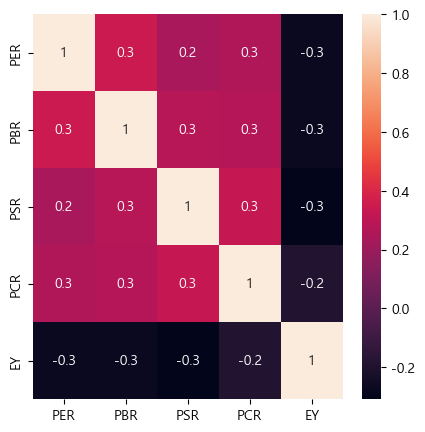

In [1634]:
X_data = kospi_ml[["PER", "PBR", "PSR", "PCR", "EY"]]
corr = X_data.corr()
plt.figure(figsize = (5, 5))
sns.heatmap(corr, annot = True, fmt = ".1g")

In [1625]:
kospi_ml

,회계년도,PER,PBR,PCR,PSR,ROE,ROA,판관비,EY,PRR,RDS,RDO,RDN,수익률
0,2018,-0.422966,-0.102793,-0.330934,-0.332123,1.047656,0.921161,-0.359154,1.639569,-0.187528,3.129084,0.452043,0.267248,-3.046683
1,2019,-0.423839,-0.059488,-0.308201,-0.325966,1.081453,1.278786,-0.598965,0.800507,-0.185292,2.655557,0.191781,0.205179,-0.812721
2,2020,-0.402431,0.296942,-0.316410,-0.254813,1.765852,2.369315,-0.677220,0.382858,-0.182456,2.384364,0.094742,0.068176,6.076923
3,2021,-0.402373,0.766631,-0.281540,-0.152189,3.006702,3.918026,-0.698407,0.613026,-0.180473,1.946054,-0.039200,-0.048378,17.607656
4,2022,-0.451123,0.130386,-0.332056,-0.254129,3.897507,4.361654,-0.583749,4.473671,-0.185392,1.617175,-0.137729,-0.099635,2.720971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3434,2022,-0.431402,0.600075,-0.274805,-0.424485,-0.912598,-0.953581,-0.376577,0.110018,-0.176832,-0.348097,-0.022350,0.653470,-1.711470
3435,2020,-0.409935,-0.489204,-0.361173,-0.442958,-1.345930,-1.178783,-0.414788,0.779251,-0.184854,0.048722,0.234392,-1.559665,-4.034247
3436,2021,-0.416683,0.130386,-0.335003,-0.406697,0.861769,-0.500575,-0.575194,1.024514,-0.181470,-0.052962,-0.062123,0.034656,24.213548
3441,2021,0.002637,3.248322,-0.383625,0.683859,4.157023,0.557083,-0.759238,-0.978576,-0.189092,-0.456484,-0.297140,-0.206105,0.000000


In [1626]:
X_train_col = train.drop(["회계년도", "수익률"], axis = 1).columns
X_test_col = test.drop(["회계년도", "수익률"], axis = 1).columns

In [1627]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train = train[X_train_col]
X_test = test[X_test_col]


y_train = train[["수익률"]]
y_test = test[["수익률"]]

model=LinearRegression()
model.fit(X_train,y_train)

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse=np.sqrt(mse)

print(f"MSE : {mse:.3f}, RMSE:{rmse:.3f}")
print(f"Variance score:{r2_score(y_test,y_preds):.3f}")

MSE : 22.279, RMSE:4.720
Variance score:-0.210


In [1628]:
coef = model.coef_
inter = model.intercept_
print(X_train.columns)
print(coef, inter)

Index(['PER', 'PBR', 'PCR', 'PSR', 'ROE', 'ROA', '판관비', 'EY', 'PRR', 'RDS',
       'RDO', 'RDN'],
      dtype='object')
[[ 0.63956925  1.48119214 -0.07197843 -0.1473143   1.53309081 -0.08858081
  -0.3333419   0.19049968 -0.26942518 -0.40324037 -0.27937619 -0.06890742]] [2.23613299]


In [1647]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

y_target = kospi_ml["수익률"]
X_data = kospi_ml[["PBR", "RDS", "판관비"]]

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(" 5 folds 의 개별 Negative MSE scores : ", np.round(neg_mse_scores, 3))
print(" 5 folds 의 개별 RMSE score : ", np.round(rmse_scores, 3))
print(" 5 folds 의 개별 평균 RMSE : {0:.3f}".format(avg_rmse))

 5 folds 의 개별 Negative MSE scores :  [-72.594 -47.93  -57.713 -65.215 -61.056]
 5 folds 의 개별 RMSE score :  [8.52  6.923 7.597 8.076 7.814]
 5 folds 의 개별 평균 RMSE : 7.786


<Axes: >

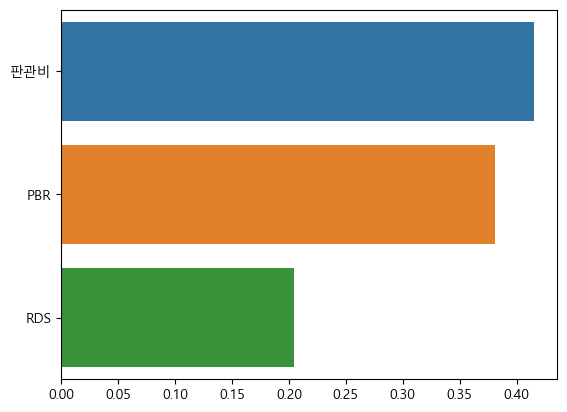

In [1650]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습한다.
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

In [1651]:
rf_reg.feature_importances_

array([0.38067481, 0.20426691, 0.41505828])

In [1653]:
len(kospi["회사명"].unique())

673